In [ ]:
import pandas as pd
import numpy as np

Agrupamento -->

Split, apply, combine

O dataset é o KC House data, dados para venda de imóveis na região de King County.

O objetivo deste notebook é responder algumas perguntas de negócio, manipular dados e gerar insights através de análises ou dashboards.

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/kc_house_data.csv')

In [ ]:
#Entendendo o dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# quantos imoveis existem por número de quartos
data['bedrooms'] 

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

In [ ]:
print(data[data['bedrooms'] ==0].shape) #conta o nro de linhas
print(data[data['bedrooms'] ==1].shape)
print(data[data['bedrooms'] ==2].shape)
print(data[data['bedrooms'] ==3].shape)
print(data[data['bedrooms'] ==4].shape)

(13, 21)
(199, 21)
(2760, 21)
(9824, 21)
(6882, 21)


Exibir a quantidade de imóveis por número de quartos

In [ ]:
## quero automatizar  (se eu tiver um dataset muito longo)
# -- group by
df_grouped  = data[['id','bedrooms']].groupby('bedrooms').size()
print(df_grouped)

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64


Gerar variável para aplicar modificações (groupby)

In [ ]:
data_grouped  = data[['id','bedrooms']].groupby('bedrooms')
print(data_grouped)

In [ ]:
### APLICANDO
for bedrooms,frame in data_grouped:
  print('numero de quartos: {}'.format(bedrooms))
  print(frame.shape, end = '\n')

numero de quartos: 0
(13, 2)
numero de quartos: 1
(199, 2)
numero de quartos: 2
(2760, 2)
numero de quartos: 3
(9824, 2)
numero de quartos: 4
(6882, 2)
numero de quartos: 5
(1601, 2)
numero de quartos: 6
(272, 2)
numero de quartos: 7
(38, 2)
numero de quartos: 8
(13, 2)
numero de quartos: 9
(6, 2)
numero de quartos: 10
(3, 2)
numero de quartos: 11
(1, 2)
numero de quartos: 33
(1, 2)


In [ ]:

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
## 1. Qual o número de imóveis por ano de construção?
data[['id','yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [ ]:
## 2. Qual o menor número de quartos por ano de construção do imóvel?
data[['bedrooms','yr_built']].groupby('yr_built').min()


,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [ ]:
## 3. Qual o preço de compra mais alto por cada número de quarto?
data[['price','bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [ ]:
## 4. Qual a soma de todos os preços de compra por número de quartos?
#não exibir notação científica
pd.set_option('display.float_format',lambda x: '%.3f'%x)
data[['price','bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


In [ ]:
##5. Qual a soma de todos os preços de compra por número de quartos e banheiros?
data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms            
0        0.000     3642600.000
         0.750      265000.000
         1.000      228000.000
         1.500      288000.000
         2.500      899950.000
...                        ...
10       2.000      650000.000
         3.000      660000.000
         5.250     1148000.000
11       3.000      520000.000
33       1.750      640000.000

[144 rows x 1 columns]

Descrever as colunas do dataset:

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
## 6. Qual o tamanho médio das salas dos imóveis (área) por ano de construção?

data[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011
1901,1763.621
1902,1919.630
1903,1507.739
1904,1603.178
...,...
2011,2313.685
2012,2378.741
2013,2636.592


In [ ]:
## 7. Qual o tamanho mediano das salas dos imóveis (área) por ano de construção?

data[['sqft_living','yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.000
1901,1610.000
1902,1600.000
1903,1505.000
1904,1280.000
...,...
2011,2270.000
2012,2237.500
2013,2580.000


In [ ]:
## 8. Qual o desvio padrão das salas dos imóveis (área) por ano de construção?

data[['sqft_living','yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.944
1901,668.232
1902,878.659
1903,469.723
1904,1076.871
...,...
2011,804.864
2012,771.430
2013,883.499


In [ ]:
## 9. Qual o crescimento médio de preços de compras dos imóveis por ano (1),
## por dia(2) e pela semana do ano (3)?

<BarContainer object of 2 artists>

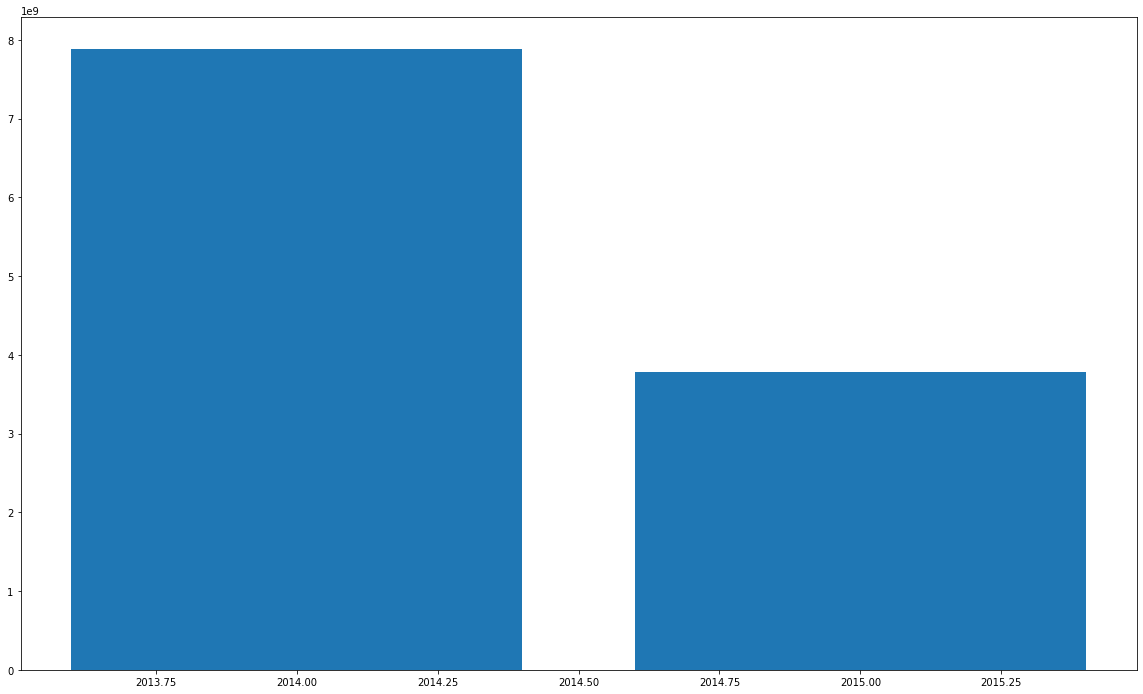

In [ ]:
## Gráfico 1
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['year'] = pd.to_datetime(data['date']).dt.year
#data[['price','year']].groupby('year').sum()
by_year = data[['price','year']].groupby('year').sum().reset_index()
plt.figure(figsize=(20,12))
plt.bar(by_year['year'], by_year['price'])

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650,2014,2014-10-13,2014-41
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,2014-12-09,2014-49
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2015-02-25,2015-08
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000,2014,2014-12-09,2014-49
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2015-02-18,2015-07


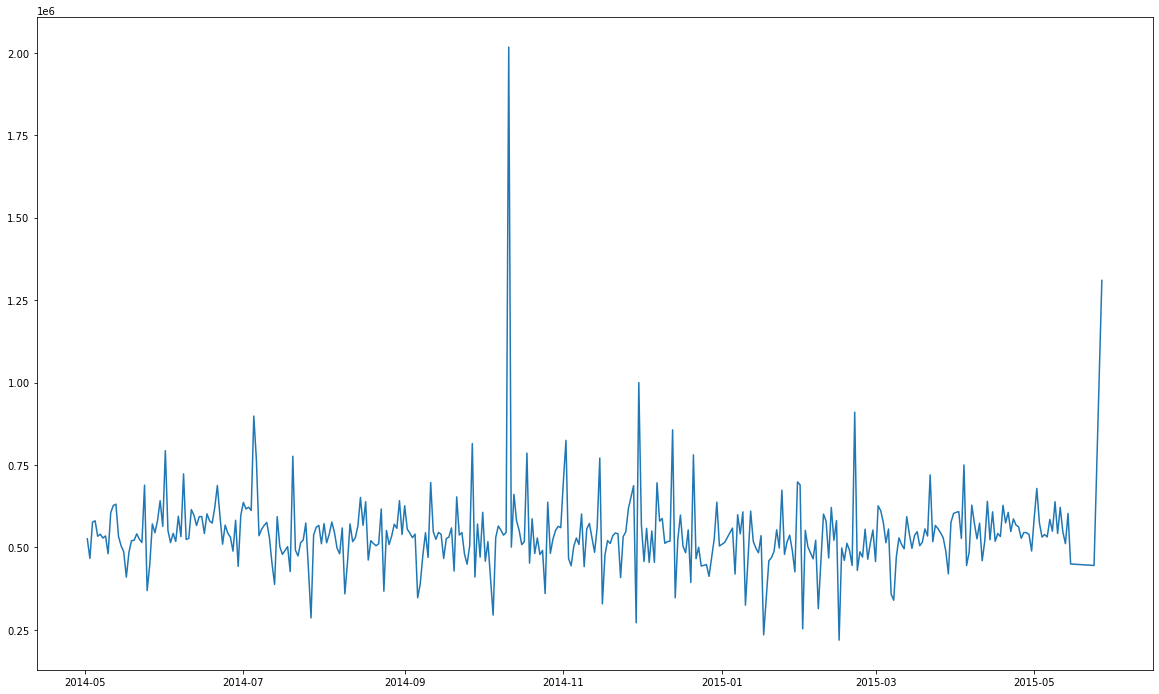

In [ ]:
## Gráfico 2 - preços por dia
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['day'] = pd.to_datetime(data['date'])
#data[['price','year']].groupby('year').sum()
by_day = data[['price','day']].groupby('day').mean().reset_index()
plt.figure(figsize=(20,12))
plt.plot(by_day['day'], by_day['price'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text major ticklabel objects>)

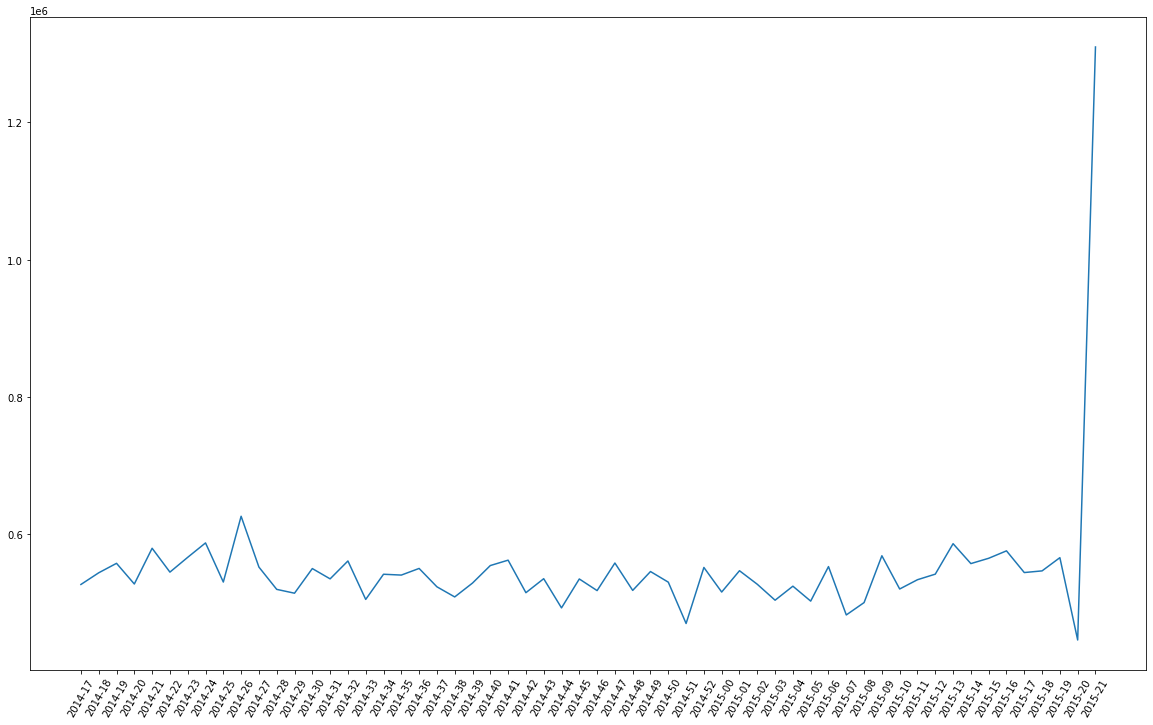

In [ ]:
## Gráfico 3 - preços por dia
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%W') #year-week
#data[['price','year']].groupby('year').sum()
by_week_year = data[['price','year_week']].groupby('year_week').mean().reset_index()
plt.figure(figsize=(20,12))
plt.plot(by_week_year['year_week'], by_week_year['price'])
#rotação
plt.xticks(rotation=60) ##exibição da legenda do eixo x em rotação

Unificar os três gráficos na célula de execução

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text major ticklabel objects>)

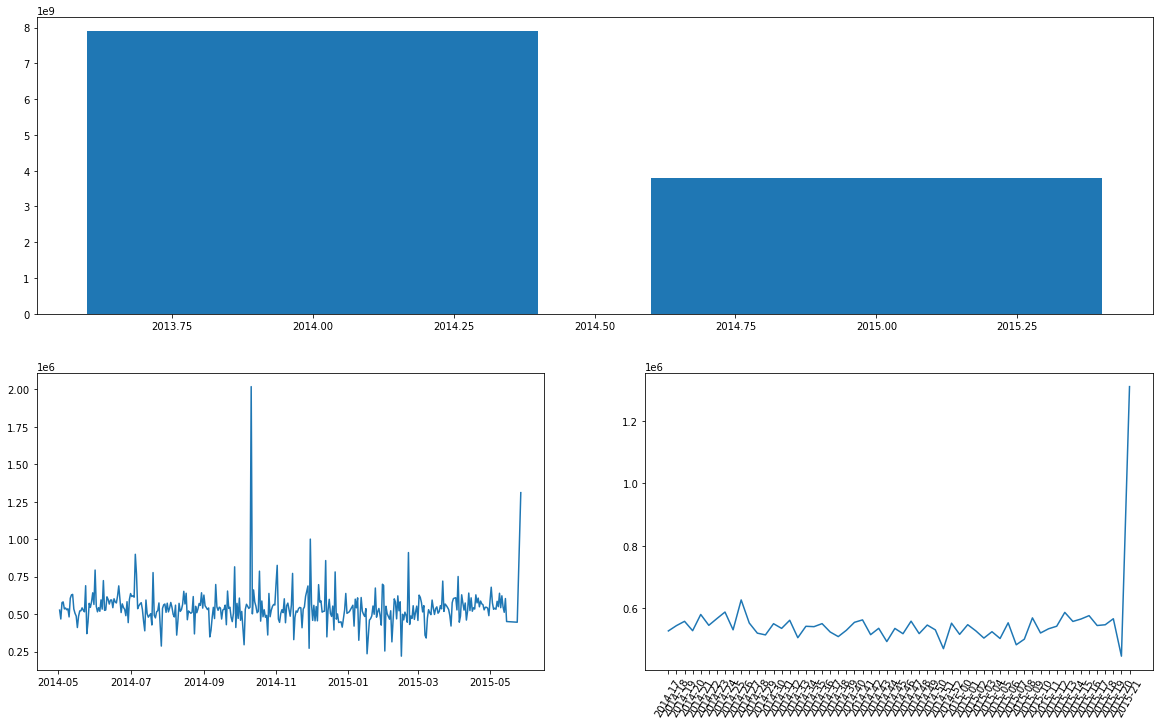

In [ ]:
from matplotlib import gridspec


fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)


ax1 = fig.add_subplot(specs[0,:])#linha 1
ax2 = fig.add_subplot(specs[1,0])#linha 2, coluna1
ax3 = fig.add_subplot(specs[1,1])

## Gráfico 1
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['year'] = pd.to_datetime(data['date']).dt.year
#data[['price','year']].groupby('year').sum()
by_year = data[['price','year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'], by_year['price'])

## Gráfico 2 - preços por dia
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['day'] = pd.to_datetime(data['date'])
#data[['price','year']].groupby('year').sum()
by_day = data[['price','day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'], by_day['price'])

## Gráfico 3 - preços por dia
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%W') #year-week
#data[['price','year']].groupby('year').sum()
by_week_year = data[['price','year_week']].groupby('year_week').mean().reset_index()
ax3.plot(by_week_year['year_week'], by_week_year['price'])
#rotação
plt.xticks(rotation=60)

In [ ]:
# Olhar no mapa e identificar as casas com o maior preço
## quanto maior o preço, maior o tamanho da circunferência no gráfico

import plotly.express as px

houses = data[['id','lat','long','price']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom = 10)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0})
fig.show()

* 1) Criar nova coluna, dormitory_type:
  * Se bedrooms =1 : studio
  * Se bedrooms =2 : apartment
  * Se bedrooms > 2 : house

In [ ]:
def func(row):
    if row['bedrooms'] == 1:
        return 'Studio'
    elif row['bedrooms'] == 2:
        return 'Apartment' 
    else:
        return 'House'

data['Type'] = data.apply(func, axis=1)
data
#data['Type'] = ['Studio' if x == 1  'Apartment' elif x==2  else 'House' for x in data['bedrooms']]
#data['type'] = np.where(data['bedrooms'] == 1, 'Studio')



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week,Type
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650,2014,2014-10-13,2014-41,House
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,2014-12-09,2014-49,House
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2015-02-25,2015-08,Apartment
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000,2014,2014-12-09,2014-49,House
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2015-02-18,2015-07,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530.000,0,2009,0,98103,47.699,-122.346,1530,1509,2014,2014-05-21,2014-20,House
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310.000,0,2014,0,98146,47.511,-122.362,1830,7200,2015,2015-02-23,2015-08,House
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020.000,0,2009,0,98144,47.594,-122.299,1020,2007,2014,2014-06-23,2014-25,Apartment
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600.000,0,2004,0,98027,47.535,-122.069,1410,1287,2015,2015-01-16,2015-02,House


In [ ]:
#data = data.drop('type', axis = 1)


## 2) Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

In [ ]:
data[['price','bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09]),
 <a list of 6 Text major ticklabel objects>)

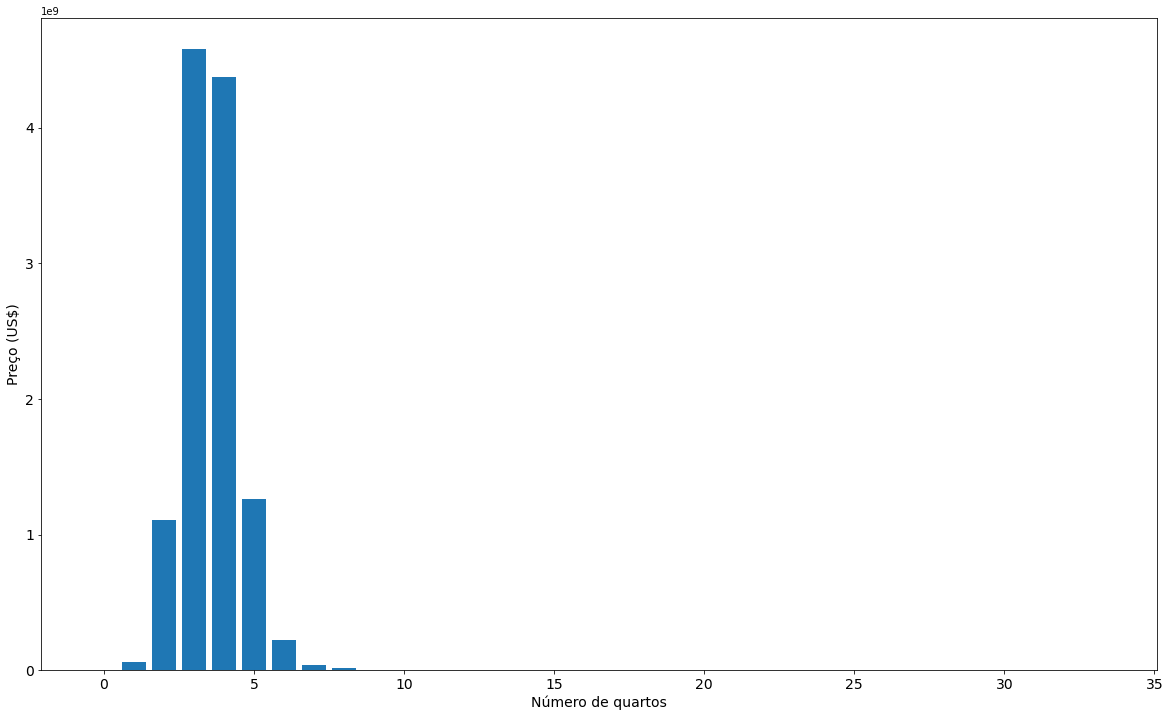

In [ ]:
#data['day'] = pd.to_datetime(data['date'])
#data[['price','year']].groupby('year').sum()
by_room = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
#data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()
#data[['sqft_living','yr_built']].groupby('yr_built').mean()by_room = 
#print(by_room)
plt.figure(figsize=(20,12))
plt.bar(by_room['bedrooms'], by_room['price'])
plt.xlabel('Número de quartos', fontsize = 14)
plt.ylabel('Preço (US$)', fontsize = 14)
#aumentar tamanho fonte dados x e y
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


3) Gráfico de linhas que represente a média dos preços por ano de construção

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'day',
       'year_week', 'Type'],
      dtype='object')

(array([300000., 400000., 500000., 600000., 700000., 800000.]),
 <a list of 6 Text major ticklabel objects>)

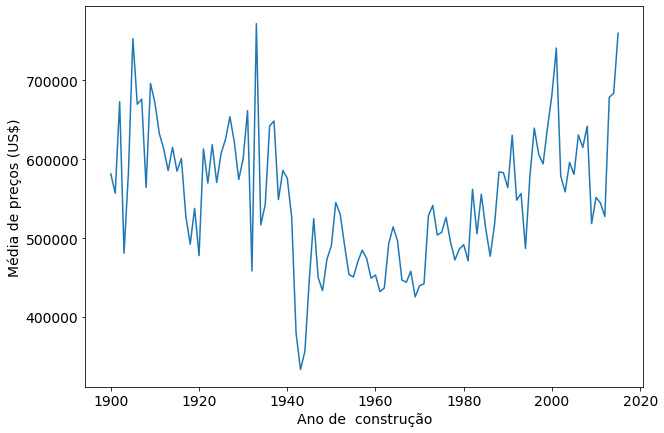

In [ ]:
data[['price','yr_built']].groupby('yr_built').mean()
by_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(10,7))
plt.plot(by_year['yr_built'], by_year['price'])
plt.xlabel('Ano de  construção', fontsize = 14)
plt.ylabel('Média de preços (US$)', fontsize = 14)
#aumentar tamanho fonte dados x e y
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

4) Faça um gráfico de barras que represente a média dos preços por tipo de dormitório

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]), <a list of 7 Text major ticklabel objects>)

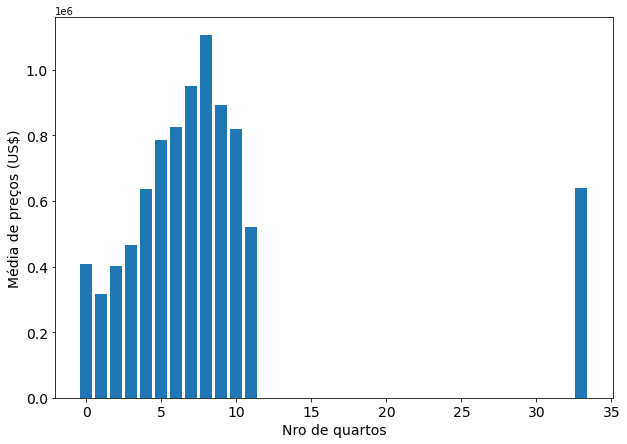

In [ ]:
data[['price','bedrooms']].groupby('bedrooms').mean()
by_room = data[['price','bedrooms']].groupby('bedrooms').mean().reset_index()
plt.figure(figsize=(10,7))
plt.bar(by_room['bedrooms'], by_room['price'])
plt.xlabel('Nro de quartos', fontsize = 14)
plt.ylabel('Média de preços (US$)', fontsize = 14)
#aumentar tamanho fonte dados x e y
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


5) Faça um gráfico de linhas quer mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir de 1930 

(array([ 200000.,  400000.,  600000.,  800000., 1000000., 1200000.,
        1400000.]), <a list of 7 Text major ticklabel objects>)

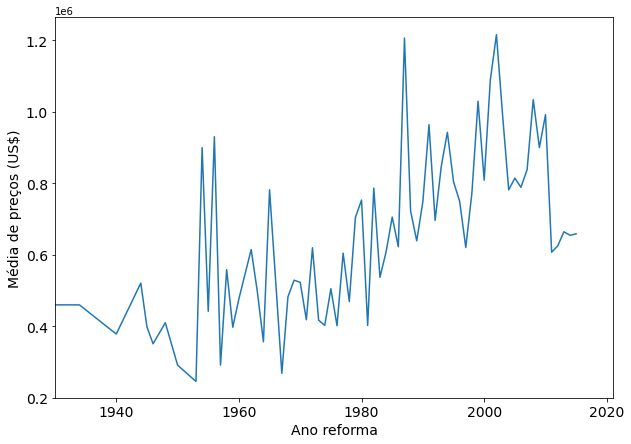

In [ ]:
data[['price','yr_renovated']].groupby('yr_renovated').mean()
by_year = data[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.figure(figsize=(10,7))
plt.plot(by_year['yr_renovated'], by_year['price'])
plt.xlim(1930,2021)
plt.ylim(200000)

plt.xlabel('Ano reforma', fontsize = 14)
plt.ylabel('Média de preços (US$)', fontsize = 14)
#aumentar tamanho fonte dados x e y
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


6) Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios de imóveis

In [ ]:
oi = data[['price','bedrooms','yr_built']].groupby(['yr_built','bedrooms']).mean()
#print(oi)
#data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()
df_2 = pd.DataFrame(data=oi)
print(df_2)


                       price
yr_built bedrooms           
1900     1        398944.000
         2        589533.333
         3        527451.256
         4        636726.087
         5        625000.000
...                      ...
2015     1        385195.000
         2        543250.000
         3        609200.000
         4        940324.308
         5        820913.889

[690 rows x 1 columns]


7) Crie um dashboard com as questões 2,3,4 (1 Linha 2 colunas)

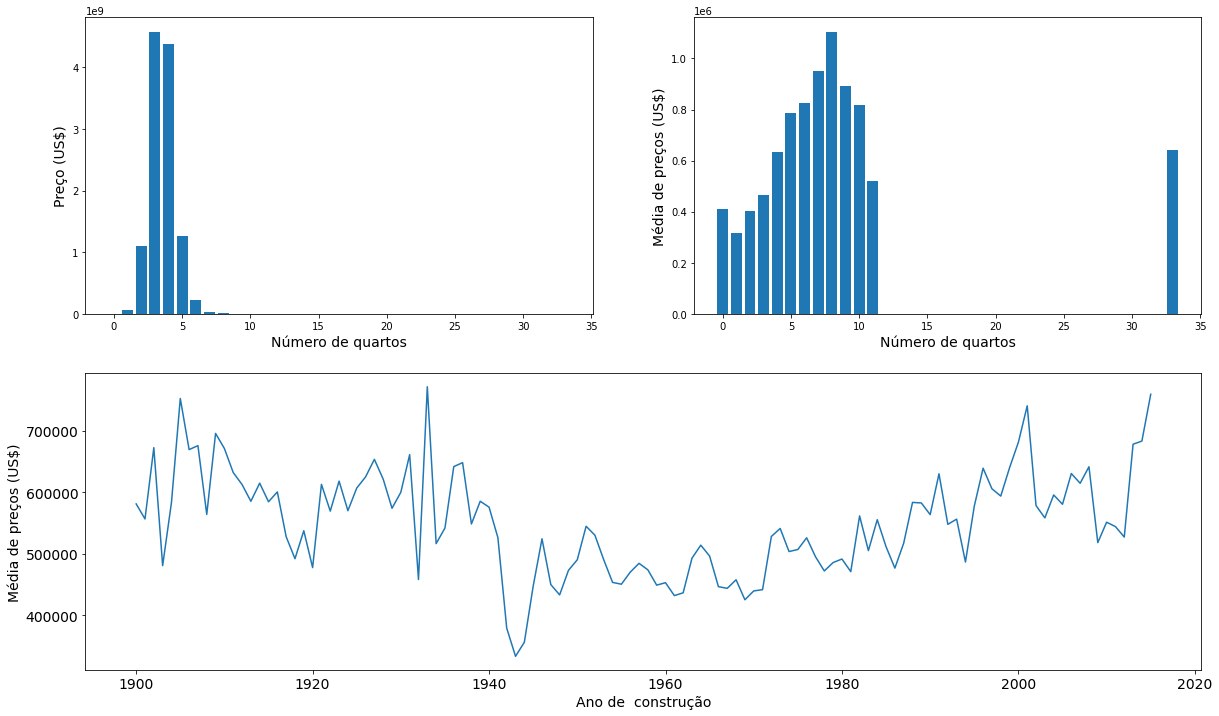

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(specs[0,0])#linha 1
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[1,:])

## Gráfico 1
from matplotlib import pyplot as plt
#x: anos
#y: soma dos preços
#gráfico: barras

by_room = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_room['bedrooms'], by_room['price'])
ax1.set_xlabel('Número de quartos', fontsize = 14)
ax1.set_ylabel('Preço (US$)', fontsize = 14)
plt.tick_params( labelsize=14)




data[['price','bedrooms']].groupby('bedrooms').mean()
by_room = data[['price','bedrooms']].groupby('bedrooms').mean().reset_index()
#plt.figure(figsize=(10,7))
ax2.bar(by_room['bedrooms'], by_room['price'])
ax2.set_xlabel('Número de quartos', fontsize = 14)
ax2.set_ylabel('Média de preços (US$)', fontsize = 14)
plt.tick_params( labelsize=14)



data[['price','yr_built']].groupby('yr_built').mean()
by_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
#plt.figure(figsize=(10,7))
ax3.plot(by_year['yr_built'], by_year['price'])
ax3.set_xlabel('Ano de  construção', fontsize = 14)
ax3.set_ylabel('Média de preços (US$)', fontsize = 14)

plt.tick_params( labelsize=14)


8) Crie um dashboard com as questões 2, 4 (2 colunas)

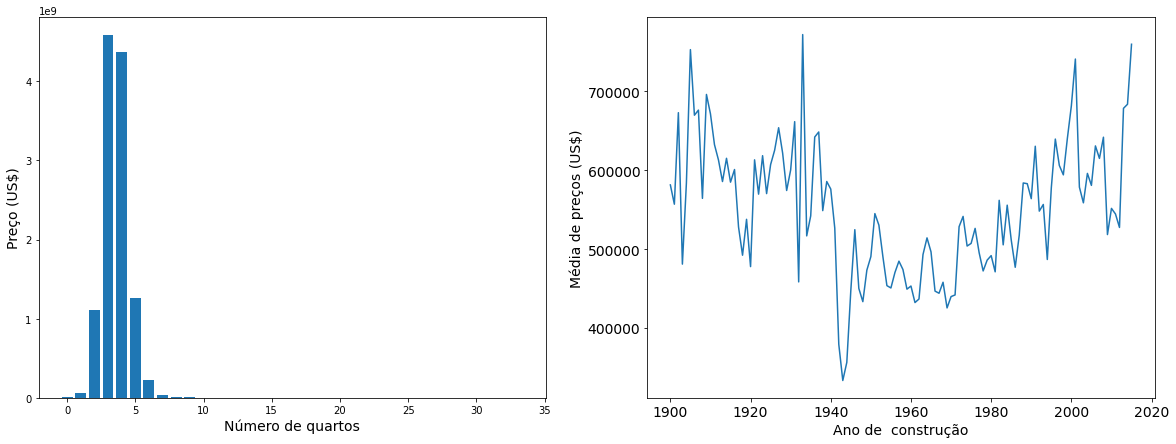

In [ ]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[:, 0])
#Positive image
ax2 = fig.add_subplot(gs[0, 1])


by_room = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
#data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()
#data[['sqft_living','yr_built']].groupby('yr_built').mean()by_room = 
#print(by_room)
ax1.bar(by_room['bedrooms'], by_room['price'])
ax1.set_xlabel('Número de quartos', fontsize = 14)
ax1.set_ylabel('Preço (US$)', fontsize = 14)
#aumentar tamanho fonte dados x e y


data[['price','yr_built']].groupby('yr_built').mean()
by_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
#plt.figure(figsize=(10,7))
ax2.plot(by_year['yr_built'], by_year['price'])
ax2.set_xlabel('Ano de  construção', fontsize = 14)
ax2.set_ylabel('Média de preços (US$)', fontsize = 14)
plt.tick_params( labelsize=14)




9) Crie um dashboard com as questões 3,5 (2 linhas)

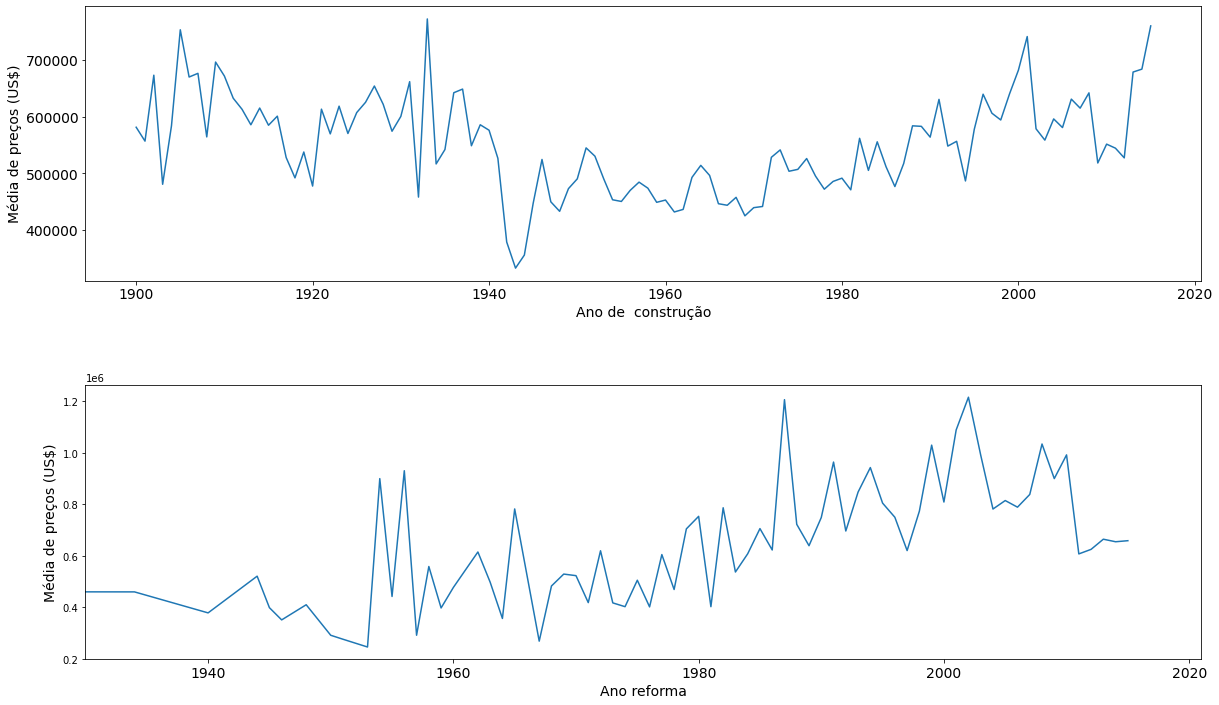

In [ ]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(3, 1,height_ratios=[1, 0.1, 1])
ax1 = fig.add_subplot(gs[0, :])
ax2.set_visible(False)
ax3 = fig.add_subplot(gs[2, :])

data[['price','yr_built']].groupby('yr_built').mean()
by_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(by_year['yr_built'], by_year['price'])
ax1.set_xlabel('Ano de  construção', fontsize = 14)
ax1.set_ylabel('Média de preços (US$)', fontsize = 14)
ax1.tick_params( labelsize=14)


data[['price','yr_renovated']].groupby('yr_renovated').mean()
by_year = data[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax3.plot(by_year['yr_renovated'], by_year['price'])
ax3.set_xlim(1930,2021)
ax3.set_ylim(200000)
ax3.set_xlabel('Ano reforma', fontsize = 14)
ax3.set_ylabel('Média de preços (US$)', fontsize = 14)
plt.tick_params(axis='x',
           which='both',labelsize=14)


10) Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week,Type
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650,2014,2014-10-13,2014-41,House
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,2014-12-09,2014-49,House
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2015-02-25,2015-08,Apartment
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000,2014,2014-12-09,2014-49,House
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2015-02-18,2015-07,House


In [ ]:
#np.where(data['sqft_living'] == 1, 'Studio')
print(data[data['sqft_above'] == data['sqft_living']].shape)
print(data[data['sqft_lot15'] == data['sqft_living15']].shape)
pontos = data[data['sqft_above'] == data['sqft_living']].groupby('sqft_living').count()
print(pontos)
#plt.scatter(pontos['sqft_living'],pontos['sqft_above'],c='k')
#plt.xlabel('Área sala de estar')
#plt.ylabel('Área above')


(13125, 25)
(0, 25)
             id  date  price  bedrooms  ...  year  day  year_week  Type
sqft_living                             ...                            
290           1     1      1         1  ...     1    1          1     1
370           1     1      1         1  ...     1    1          1     1
380           1     1      1         1  ...     1    1          1     1
384           1     1      1         1  ...     1    1          1     1
390           2     2      2         2  ...     2    2          2     2
...          ..   ...    ...       ...  ...   ...  ...        ...   ...
7320          1     1      1         1  ...     1    1          1     1
7420          1     1      1         1  ...     1    1          1     1
7850          1     1      1         1  ...     1    1          1     1
7880          1     1      1         1  ...     1    1          1     1
8020          1     1      1         1  ...     1    1          1     1

[853 rows x 24 columns]
